### **Install Panda**

In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Import required Labraries**

In [ ]:
import pandas as pd
import numpy as np

### **Upload Dataset into Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/sale.csv"
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Print Dataset information**

In [ ]:
#dataset informations
print("The data set has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The data set has 8523 rows and 12 columns


# **Performing pre-proccessing and analysis which has been asked in the Homework**

## **1- Statistical Descriptions of Dataset**

In [ ]:
display(df.describe())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
display(df.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
display(df.dtypes.value_counts())

object     7
float64    4
int64      1
dtype: int64

## **2- Finding Missing Values in Dataset and solving the issue**



### **First we seperate Categorical and numerical attributes in Dataset**

In [ ]:
df.dtypes == 'object'

Item_Identifier               True
Item_Weight                  False
Item_Fat_Content              True
Item_Visibility              False
Item_Type                     True
Item_MRP                     False
Outlet_Identifier             True
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type          True
Outlet_Type                   True
Item_Outlet_Sales            False
dtype: bool

In [ ]:
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

In [ ]:
df[num_vars]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [ ]:
df[cat_vars]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


### **Now we see which numerical attributes has missing values**




In [ ]:
df[num_vars].isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

### **We also check which categorical attributes have missing values**

In [ ]:
df[cat_vars].isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

### **Now we calculate the percenatge of missing values in each column**

In [ ]:
df.isnull().sum().sort_values(ascending=False)/len(df)

Outlet_Size                  0.282764
Item_Weight                  0.171653
Item_Identifier              0.000000
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

### **Now we replace missing values in numerical attribute by the mean of the column and we replace missing values in categorical attribute by the mode of the column**

In [ ]:
# Impute missing values in Item_Weight with the mean of the column
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

# Impute missing values in Outlet_Size with the mode of the column
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

### **Now we check if there is any missing values in Dataset and we see all missing values are removed**

In [ ]:
# Verify that all missing values have been filled
print(df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


## **3- Finding Outliers, draw Box Plot for them and solving their issues**

### **We check each attribute to see if it has any outlier by IQR method**

In [ ]:
# Calculate the IQR for the Item_Weight column
q1 = df['Item_Weight'].quantile(0.25)
q3 = df['Item_Weight'].quantile(0.75)
iqr = q3 - q1

# Identify potential outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Item_Weight'] < lower_bound) | (df['Item_Weight'] > upper_bound)]

# Print the potential outliers
print(outliers)


Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [ ]:
# Calculate the IQR for the Item_MRP
q1 = df['Item_MRP'].quantile(0.25)
q3 = df['Item_MRP'].quantile(0.75)
iqr = q3 - q1

# Identify potential outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Item_MRP'] < lower_bound) | (df['Item_MRP'] > upper_bound)]

# Print the potential outliers
print(outliers)


Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [ ]:
# Calculate the IQR for the Outlet_Establishment_Year column
q1 = df['Outlet_Establishment_Year'].quantile(0.25)
q3 = df['Outlet_Establishment_Year'].quantile(0.75)
iqr = q3 - q1

# Identify potential outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Outlet_Establishment_Year'] < lower_bound) | (df['Outlet_Establishment_Year'] > upper_bound)]

# Print the potential outliers
print(outliers)


Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [ ]:
# Calculate the IQR for the Item_Outlet_Sales column
q1 = df['Item_Outlet_Sales'].quantile(0.25)
q3 = df['Item_Outlet_Sales'].quantile(0.75)
iqr = q3 - q1

# Identify potential outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Item_Outlet_Sales'] < lower_bound) | (df['Item_Outlet_Sales'] > upper_bound)]

# Print the potential outliers
print(outliers)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
43             FDC02    21.350000          Low Fat         0.069103   
130            FDY25    12.857645          Low Fat         0.033810   
132            NCR53    12.857645          Low Fat         0.144338   
145            FDP16    18.600000          Low Fat         0.039356   
203            FDI24    12.857645          Low Fat         0.078362   
...              ...          ...              ...              ...   
8245           FDU55    16.200000          Low Fat         0.035967   
8329           NCQ06    12.857645          Low Fat         0.041622   
8350           NCE18    10.000000          Low Fat         0.021421   
8447           FDS26    20.350000          Low Fat         0.089975   
8510           FDN58    13.800000          Regular         0.056862   

                  Item_Type  Item_MRP Outlet_Identifier  \
43                   Canned  259.9278            OUT018   
130                  Canned  

In [ ]:


# Calculate the IQR for the Item_Visibility column
q1 = df['Item_Visibility'].quantile(0.25)
q3 = df['Item_Visibility'].quantile(0.75)
iqr = q3 - q1

# Identify potential outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Item_Visibility'] < lower_bound) | (df['Item_Visibility'] > upper_bound)]

# Print the potential outliers
print(outliers)


     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
49             FDS02    12.857645          Regular         0.255395   
83             NCL18    12.857645          Low Fat         0.293418   
108            DRE60    12.857645          low fat         0.278974   
174            FDI32    17.700000          Low Fat         0.291865   
334            FDC41    12.857645          Low Fat         0.204700   
...              ...          ...              ...              ...   
8292           FDF56    12.857645          Regular         0.209163   
8345           FDY28    12.857645          Regular         0.266397   
8371           DRA59     8.270000          Regular         0.214125   
8432           FDI16    14.000000          Regular         0.227261   
8509           FDG45     8.100000          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
49                    Dairy  196.8794            OUT019   
83                Household  

### **After checking all attributes we find out Item_Outlet_Sales & Item_Visibility have outliers**

### **Now we draw Box Plot for these columns**

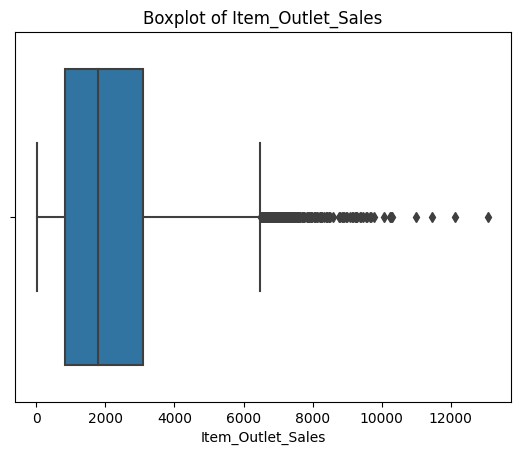

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df['Item_Outlet_Sales'])
plt.title('Boxplot of Item_Outlet_Sales')
plt.show()

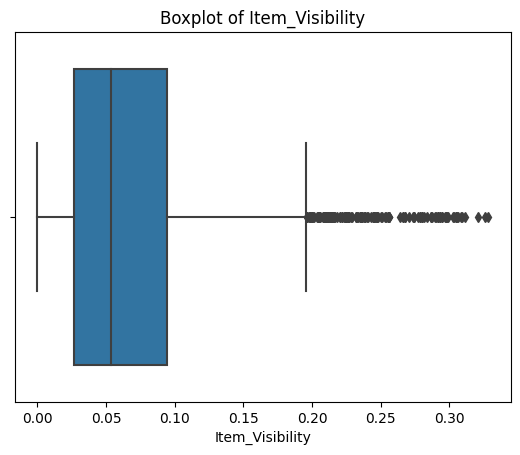

In [ ]:
import matplotlib.pyplot as plt
sns.boxplot(x=df['Item_Visibility'])
plt.title('Boxplot of Item_Visibility')
plt.show()

### **Now we replace Outliers with a rational value**

In [ ]:
# Define the columns to check for outliers
cols_to_check = ['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Loop through the columns and clip the outliers
for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

### **Now we draw box plot again to see if outliers have been replaced properly**

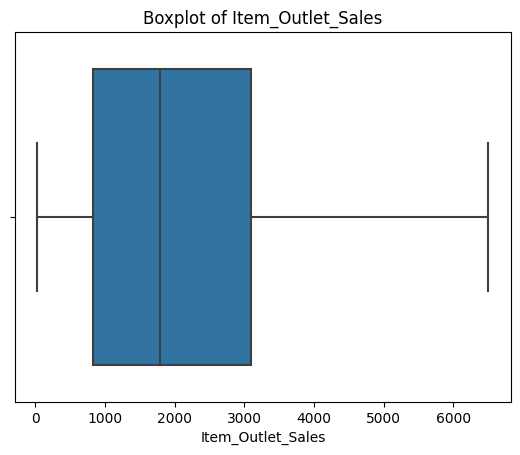

In [ ]:
# Verify that outlier values have been replaced properly
import matplotlib.pyplot as plt
sns.boxplot(x=df['Item_Outlet_Sales'])
plt.title('Boxplot of Item_Outlet_Sales')
plt.show()

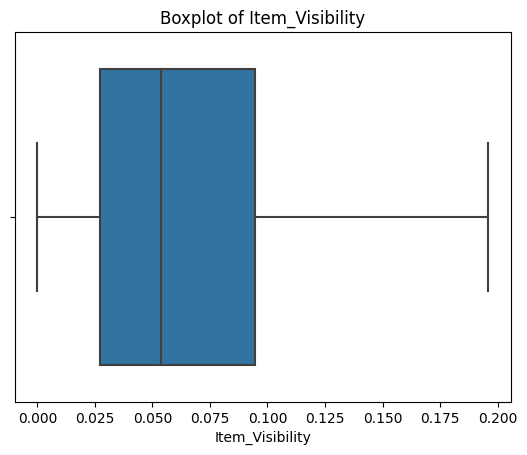

In [ ]:
# Verify that outlier values have been replaces properly
import matplotlib.pyplot as plt
sns.boxplot(x=df['Item_Visibility'])
plt.title('Boxplot of Item_Visibility')
plt.show()

## **4- Normalising the Data in our Datset**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to normalize
cols_to_normalize = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Create a scaler object
scaler = MinMaxScaler()

# Normalize the data
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

## **5- Transforming categorical data to numerical**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the columns to be transformed
cat_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Initialize a LabelEncoder object
le = LabelEncoder()

# Iterate over the categorical columns and transform them
for col in cat_columns:
    df[col] = le.fit_transform(df[col])


### **The result of transforming categorical data to numerical**

In [ ]:
display(df.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,0.282525,1,0.081883,4,0.927507,9,0.583333,1,0,1,0.572281
1,8,0.081274,2,0.098369,14,0.072068,3,1.000000,1,2,2,0.063404
2,662,0.770765,1,0.085520,10,0.468288,9,0.583333,1,0,1,0.319078
3,1121,0.871986,2,0.000000,6,0.640093,0,0.541667,1,2,0,0.108075
4,1297,0.260494,1,0.000000,9,0.095805,1,0.083333,0,2,1,0.148628


## **6- Reduce the number of dimensions by PCA method**

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)

# Create a new data frame with the reduced dimensions
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Save the new data set
df_pca.to_csv('sale_pca.csv', index=False)

### **Showing the result of reducing the number of dimensions by PCA method**

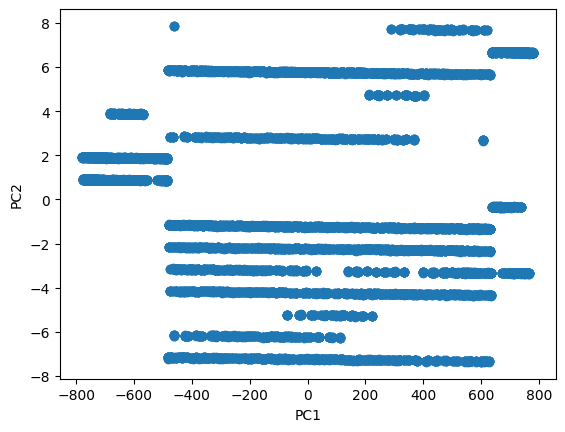

In [ ]:
import matplotlib.pyplot as plt

# Plot a scatter plot of the reduced data set
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
print(df_pca.head())

          PC1       PC2
0  623.714515 -3.314167
1  771.716016  6.629220
2  117.715531  2.768285
3 -341.285500 -1.188864
4 -517.285057  1.858551


## **7- Drawing distribution plot for 4 attributes in our Dataset**

<ipython-input-36-1b23ff173484>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


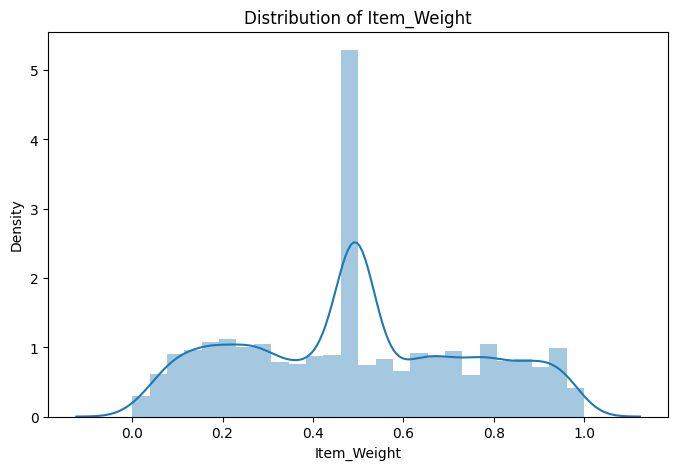

<ipython-input-36-1b23ff173484>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


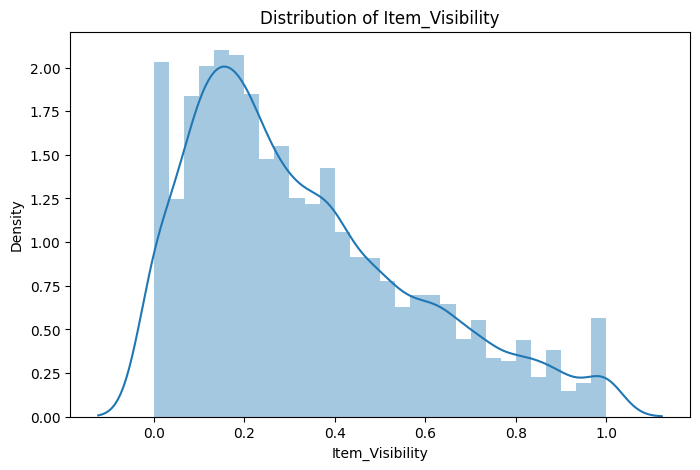

<ipython-input-36-1b23ff173484>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


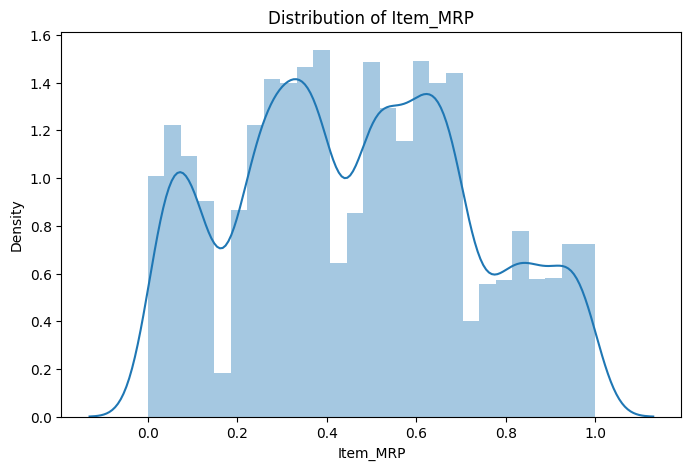

<ipython-input-36-1b23ff173484>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


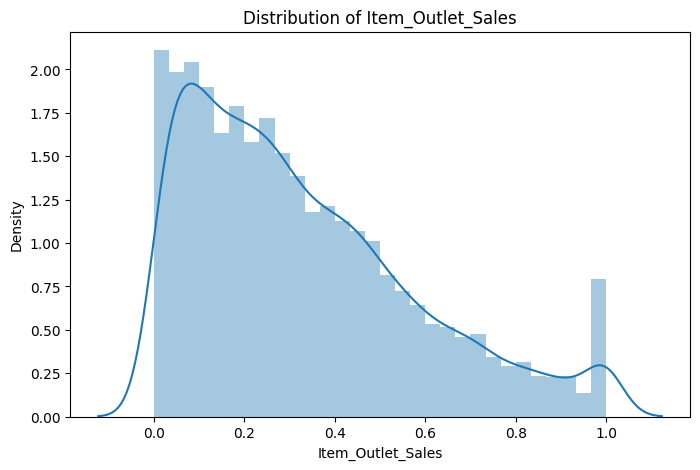

In [ ]:
# Define the columns to plot
plot_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Plot distribution plots for the selected columns
for col in plot_cols:
    plt.figure(figsize=(8, 5))
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

## **8- Drawing correlation matrix for numerical variables in our Dataset**

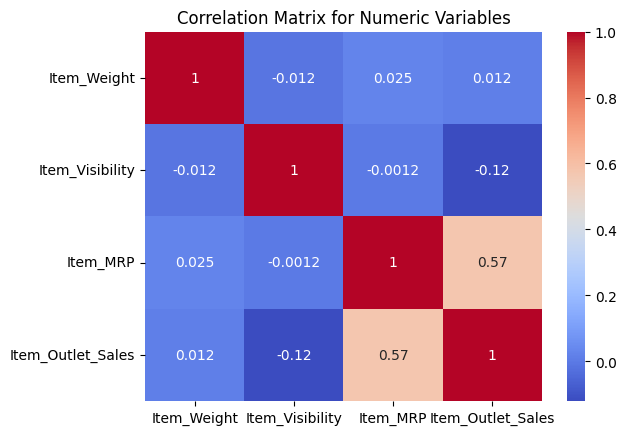

In [ ]:
# Select the numerical columns for correlation analysis
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Calculate the correlation matrix
corr_matrix = df[num_cols].corr()

# Draw a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Variables')
plt.show()